In [1]:
import pandas as pd
import json

# Cargar el archivo GeoJSON en un DataFrame usando pandas y json
file_path = 'starbucks.geojson'
with open(file_path) as f:
    data = json.load(f)

# Crear un DataFrame desde el GeoJSON
gdf = pd.json_normalize(data['features'])



In [2]:
# Imprimir las columnas disponibles en el DataFrame
gdf.columns


Index(['type', 'geometry.coordinates', 'geometry.type', 'properties.City',
       'properties.Country', 'properties.Ownership Type',
       'properties.State/Province', 'properties.Store Name',
       'properties.Store Number'],
      dtype='object')

In [3]:
# Imprimir las primeras filas de la ciudad de París
city_name = input("Ingrese el nombre de la ciudad para explorar (por ejemplo, Paris): ")
paris_data = gdf[gdf['properties.City'] == city_name]
print(paris_data.head())



Ingrese el nombre de la ciudad para explorar (por ejemplo, Paris):  Paris


         type geometry.coordinates geometry.type properties.City  \
5226  Feature        [2.33, 48.88]         Point           Paris   
5228  Feature        [2.29, 48.87]         Point           Paris   
5229  Feature        [2.33, 48.88]         Point           Paris   
5230  Feature         [2.3, 48.89]         Point           Paris   
5231  Feature        [2.33, 48.87]         Point           Paris   

     properties.Country properties.Ownership Type properties.State/Province  \
5226                 FR                  Licensed                         J   
5228                 FR             Company Owned                         J   
5229                 FR             Company Owned                         J   
5230                 FR             Company Owned                         J   
5231                 FR             Company Owned                         J   

           properties.Store Name properties.Store Number  
5226  Gare St Lazare - Mezzanine            17015-175284 

In [4]:
# Verificar los tipos de datos de las columnas
gdf.dtypes



type                         object
geometry.coordinates         object
geometry.type                object
properties.City              object
properties.Country           object
properties.Ownership Type    object
properties.State/Province    object
properties.Store Name        object
properties.Store Number      object
dtype: object

In [5]:
# Calcular el número de tiendas de Starbucks por país
tiendas_por_pais = gdf.groupby('properties.Country')['properties.Store Name'].count().reset_index()



In [6]:
tiendas_por_pais

,properties.Country,properties.Store Name
0,AD,1
1,AE,144
2,AR,108
3,AT,18
4,AU,22
...,...,...
68,TT,3
69,TW,394
70,US,13608
71,VN,25


In [7]:
# Ordenar y seleccionar los 10 primeros países con más tiendas
top_10_paises = tiendas_por_pais.sort_values(by='properties.Store Name', ascending=False).head(10)



In [8]:
top_10_paises

,properties.Country,properties.Store Name
70,US,13608
17,CN,2734
14,CA,1468
37,JP,1237
39,KR,992
29,GB,901
46,MX,579
69,TW,394
67,TR,326
54,PH,298


In [9]:
# Imprimir los tipos de datos y los 10 primeros países con más tiendas
print("Tipos de datos:")
print(gdf.dtypes)
print("\nNúmero de tiendas por país:")
print(top_10_paises)


Tipos de datos:
type                         object
geometry.coordinates         object
geometry.type                object
properties.City              object
properties.Country           object
properties.Ownership Type    object
properties.State/Province    object
properties.Store Name        object
properties.Store Number      object
dtype: object

Número de tiendas por país:
   properties.Country  properties.Store Name
70                 US                  13608
17                 CN                   2734
14                 CA                   1468
37                 JP                   1237
39                 KR                    992
29                 GB                    901
46                 MX                    579
69                 TW                    394
67                 TR                    326
54                 PH                    298


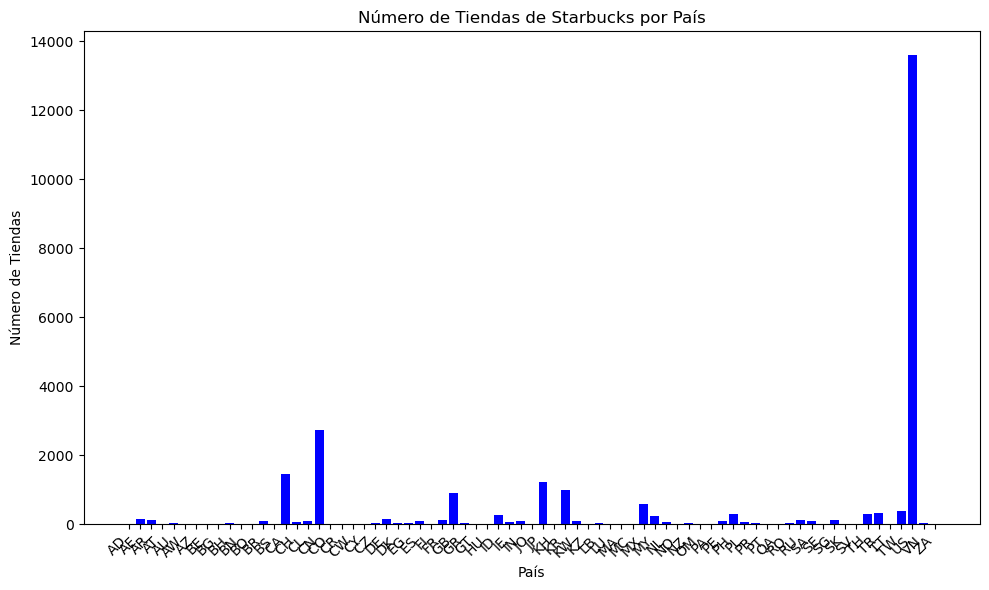

In [10]:
import matplotlib.pyplot as plt

# Crear un histograma de tiendas por país
plt.figure(figsize=(10, 6))
plt.bar(tiendas_por_pais['properties.Country'], tiendas_por_pais['properties.Store Name'], color='blue')
plt.xlabel('País')
plt.ylabel('Número de Tiendas')
plt.title('Número de Tiendas de Starbucks por País')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mayor legibilidad
plt.tight_layout()


In [11]:
# Mostrar el histograma
plt.show()